# Porftolio Optimiser

## Description
This program attempts to optimise a users portfolio using the Efficient Frontier. 

## Goal
Create portfolio of assets for which investment has maximum return for given risk level (ideally minimum) OR create portfolio that offers lowest risk for given expected return.

## Theory
Modern portfolio theory (MPT) is a model to creating a portfolio that aims to maximise the return for a given amount of risk. 

MPT encourages diversification of assets. Consider a portfolio of assets, {A, B, C} where the three assets are 'diverse'. If the three assets have little to zero correlation then we can have a portfolio with low variance on returns. 

Efficient Frontier is a graph of 'Expected returns' versues 'Volatility'. Points inside graph show set of optimal portfolios of expected returns for given risk (measured as volatility) or risk given expected returns. Points outside line are sub-optimal. 

### Assumptions
1. Asset Returns are (Jointly) Normally Distributed Random Variables
2. Correlations between Assets are Fixed and Constant Forever
3. All Investors Aim to Maximize Economic Utility
4. All Investors are Rational and Risk Averse
5. All Investors have Access to the Same Information at the Same Time
6. All Investors have Access to the Same Information at the Same Time
7. There are no Taxes or Transaction Costs
8. Investors are Price Takers
9. Every Investor has a Credit Limit
10. All Securities can be Divided into Parcels of Any Size

### Basics of the model



### 1. Portfolio Expected Return

Each asset in portfolio is weighted i.e. the proportion the asset makes up the portfolio. To calculate expected return of the porfolio we multiply weights of each asset by the expected returns of each asset, and sum.


### 2. Portfolio Standard deviation (volatility)

Calculate the annual covariance matrix and take the inner product with the weights. 

### 3. Sharpe Ratio

Sharpe ratio measures the return of an investment in relation to the risk-free rate and its risk profile.

In general, higher value of Sharpe ratio the better and lucractive the investement. 

### 4. Efficient Frontier

Plot of 'Expected return' vs 'Volatility'




# Import Packages

In [1]:
cd ../src

/Users/syed/Desktop/ideal-stock-portfolio/src


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

from assets_class import Asset
from portfolio_class import Portfolio
from datetime import datetime

%load_ext autoreload
%autoreload 2

# Download data

In [3]:
def yf_retrieve_data(ticker_list,date_range):
    data_frames = []
    for ticker in ticker_list:
        data = yf.download(ticker, start=date_range[0], end=date_range[1])
        data_frames.append(data)
    return data_frames

In [4]:
ticker_list = ["AAPL", "FB", "AMZN", "NFLX", "GOOG", "KO"]
date_range = ("2010-01-01", "2022-01-01")
data = yf_retrieve_data(ticker_list, date_range)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Create training and test data 
Split data up to see how well the optimiser works for the last year. We will use all years until the last year to train the optimiser and test the optimised weights for the last year

In [5]:
# save the recent year seperately 
data_test = [d.iloc[d.shape[0] - 250:, :] for d in data]
# update data we will use
data = [d.iloc[:d.shape[0] - 250, :] for d in data]

In [6]:
data_test = pd.concat(
            [data["Close"] for data in data_test], axis=1
        ).dropna()
data_test.columns =ticker_list

# Create portfolio

In [7]:
portfolio = Portfolio([Asset({"name": ticker, "data": data[i] }) for i,ticker in enumerate(ticker_list) ])


# Optimise Portolfio 

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
returns, stds, weights = portfolio.monte_carlo()

In [10]:
# Drawing the efficient frontier
X = []
y = []
for rt in np.linspace(-500, 500, 1000):
    weights = portfolio.optimise_with_risk_tolerance(rt)
    X.append(portfolio.portfolio_std)
    y.append(portfolio.portfolio_expected_return)

In [11]:
RISK_TOLERANCE = 20;
EXPECTED_RETURN = 0.25


portfolio.optimise_with_risk_tolerance(0)

riskless_optimise_volatility = portfolio.portfolio_std
riskless_optimise_expected_return = portfolio.portfolio_expected_return
riskless_weights = portfolio.weights



portfolio.optimise_with_risk_tolerance(risk_tolerance=RISK_TOLERANCE)
risk_tol_optimise_volatility = portfolio.portfolio_std
risk_tol_optimise_expected_return = portfolio.portfolio_expected_return
risk_tol_weights = portfolio.weights


portfolio.optimise_with_expected_return(expected_return=EXPECTED_RETURN)
expect_return_optimise_volatility = portfolio.portfolio_std
expect_return_optimise_expected_return = portfolio.portfolio_expected_return
expect_return_weights = portfolio.weights



portfolio.optimise_sharpe_ratio()
sharpe__ratio_optimise_volatility = portfolio.portfolio_std
sharpe_ratio_optimise_expected_return = portfolio.portfolio_expected_return
sharpe_ratio_weights = portfolio.weights

# Returns and Volatility Data Frame

In [12]:
volatility_returns_df = pd.DataFrame.from_dict(
    {
        "Return": [
    riskless_optimise_expected_return,risk_tol_optimise_expected_return, 
    expect_return_optimise_expected_return,sharpe_ratio_optimise_expected_return
        ], 
        "Volatility": [
            riskless_optimise_volatility, risk_tol_optimise_volatility,
            expect_return_optimise_volatility, sharpe__ratio_optimise_volatility
        ]
    }, orient="index", columns=['Riskless', 'Riskfull', "ExpectReturn", "SharpeRatio"]

)



volatility_returns_df



,Riskless,Riskfull,ExpectReturn,SharpeRatio
Return,0.107458,0.451776,0.277018,0.326631
Volatility,0.165149,0.467613,0.250000,0.269385


# Optimal weights data frame

In [13]:
optimal_weights = pd.DataFrame()

optimal_weights = pd.concat([pd.Series(riskless_weights), pd.Series(risk_tol_weights), pd.Series(sharpe_ratio_weights), pd.Series(expect_return_weights)], axis=1)
optimal_weights.index = [asset.name for asset in portfolio.assets]
optimal_weights.columns = ['Riskless', 'Riskfull', "ExpectReturn", "SharpeRatio"]

optimal_weights

,Riskless,Riskfull,ExpectReturn,SharpeRatio
AAPL,0.081731,9.159340e-16,2.597585e-01,0.062496
FB,0.031854,0.000000e+00,1.399226e-02,0.247829
AMZN,0.084764,6.938894e-16,4.395686e-01,0.364014
NFLX,0.027043,1.000000e+00,2.866807e-01,0.123219
GOOG,0.089024,6.383782e-16,2.602085e-18,0.194111
KO,0.685583,2.376571e-16,0.000000e+00,0.008331


# Plot Efficient Frontier

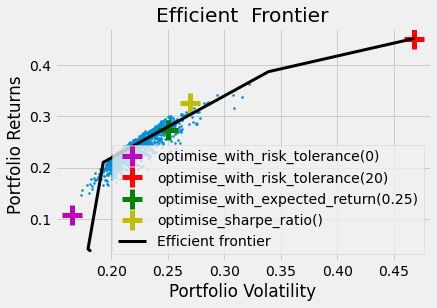

In [14]:

portfolio.optimise_with_risk_tolerance(0)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'm+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(0)')


portfolio.optimise_with_risk_tolerance(risk_tolerance=RISK_TOLERANCE)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'r+', markeredgewidth=5, markersize=20, label='optimise_with_risk_tolerance(20)')

portfolio.optimise_with_expected_return(expected_return=EXPECTED_RETURN)
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'g+', markeredgewidth=5, markersize=20, label='optimise_with_expected_return(0.25)')

portfolio.optimise_sharpe_ratio()
plt.plot(portfolio.portfolio_std, portfolio.portfolio_expected_return, 'y+', markeredgewidth=5, markersize=20, label='optimise_sharpe_ratio()')


plt.scatter(stds, returns, s=4)
plt.plot(X, y, color='k', linewidth=3, label='Efficient frontier')

plt.title("Efficient  Frontier")
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Returns")
plt.legend(loc="lower right")
plt.show()

# Test: If 1000 USD invested last year then how much return would i get?

In [15]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1 + volatility_returns_df.iloc[0,:] ))
print("--------------------------------------------------------------------------------")
print("                          Expected Returns on Potfolio                          ")
print("--------------------------------------------------------------------------------")
print(expected_return)
print("")
print(f"If {amount_invest} USD was invested on {data_test.index[0]}| I would have ...")
actual_return = (data_test.iloc[data_test.shape[0]-1,:] - data_test.iloc[0,:])/data_test.iloc[0,:]
beg_price = data_test.iloc[0,:]
end_price = data_test.iloc[data_test.shape[0]-1,:]
percentage_change = (end_price - beg_price)/(beg_price) + 1

print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,0]
print(f"Using the Portfolio Weights for Risk Tolerance {0} (Riskless)")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Staring balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")

print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,1]
print(f"Using the Portfolio Weights for Risk Tolerance {RISK_TOLERANCE}")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Staring balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")


print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,2]
print(f"Using the Portfolio Weights for Expect to Return {EXPECTED_RETURN}%")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Staring balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")


print("--------------------------------------------------------------------------------")
w = optimal_weights.iloc[:,3]
print(f"Using the Portfolio Weights for Sharpe Ratio")
money_left = sum(w*percentage_change*amount_invest)
print("")
print(f"        Staring balance {amount_invest} USD : Ending with {round(money_left,2)} USD")
print("")



--------------------------------------------------------------------------------
                          Expected Returns on Potfolio                          
--------------------------------------------------------------------------------
                   Return
Riskless      1107.458021
Riskfull      1451.775642
ExpectReturn  1277.018210
SharpeRatio   1326.631421

If 1000 USD was invested on 2021-01-06 00:00:00| I would have ...
--------------------------------------------------------------------------------
Using the Portfolio Weights for Risk Tolerance 0 (Riskless)

        Staring balance 1000 USD : Ending with 1229.89 USD

--------------------------------------------------------------------------------
Using the Portfolio Weights for Risk Tolerance 20

        Staring balance 1000 USD : Ending with 1203.7 USD

--------------------------------------------------------------------------------
Using the Portfolio Weights for Expect to Return 0.25%

        Staring balance 1000 U